<a href="https://colab.research.google.com/github/beuchi8888/Beuchi/blob/master/Estacion_AEMET_Lubia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import requests
import pandas as pd

# URL del API para los datos
url_datos = "https://opendata.aemet.es/opendata/sh/f99988ae"

# Obtener los datos en formato JSON
response = requests.get(url_datos)
data = response.json()

# Crear un dataframe con los datos
df1 = pd.DataFrame(data)

# Mostrar las primeras filas del dataframe
df1.head()

# Ahora puedes analizar la velocidad del viento y otras variables utilizando el dataframe.
# Por ejemplo, para obtener la velocidad del viento, puedes utilizar la columna 'velocidad_viento'.
# Puedes utilizar las funciones de pandas para filtrar, agrupar y analizar los datos.

,fecha,indicativo,nombre,provincia,altitud,tmed,prec,tmin,horatmin,tmax,horatmax,dir,velmedia,racha,horaracha,hrMedia,hrMax,horaHrMax,hrMin,horaHrMin
0,2023-01-01,2044B,LUBIA,SORIA,1100,"8,4","0,4","2,6",04:27,"14,3",13:45,22,"4,2","11,4",19:00,36,74,04:20,29,13:00
1,2023-01-02,2044B,LUBIA,SORIA,1100,"7,0","0,4","4,0",22:49,"9,9",11:01,20,"1,7","12,5",01:20,86,98,Varias,42,00:20
2,2023-01-03,2044B,LUBIA,SORIA,1100,"3,6","0,0","-2,7",22:57,"9,8",14:45,29,"2,8","7,2",10:00,74,100,Varias,48,16:00
3,2023-01-04,2044B,LUBIA,SORIA,1100,"5,4","0,0","-4,1",04:14,"14,8",14:28,99,"1,7","3,6",Varias,58,100,02:50,27,15:10
4,2023-01-05,2044B,LUBIA,SORIA,1100,"6,7","0,0","-1,5",06:59,"14,9",14:46,26,"1,9","5,0",17:40,68,100,00:20,35,15:10


In [29]:

import requests
import pandas as pd

# URL del API para los datos
url_datos = "https://opendata.aemet.es/opendata/sh/1e8174ea"

# Obtener los datos en formato JSON
response = requests.get(url_datos)
data = response.json()

# Crear un dataframe con los datos
df2 = pd.DataFrame(data)

# Mostrar las primeras filas del dataframe
df2.head()

# Ahora puedes analizar la velocidad del viento y otras variables utilizando el dataframe.
# Por ejemplo, para obtener la velocidad del viento, puedes utilizar la columna 'velocidad_viento'.
# Puedes utilizar las funciones de pandas para filtrar, agrupar y analizar los datos.


,fecha,indicativo,nombre,provincia,altitud,tmed,prec,tmin,horatmin,tmax,horatmax,dir,velmedia,racha,horaracha,hrMedia,hrMax,horaHrMax,hrMin,horaHrMin
0,2023-07-01,2044B,LUBIA,SORIA,1100,"17,2","0,0","8,4",03:33,"25,9",13:55,08,"2,5","9,2",17:30,54,97,Varias,46,14:00
1,2023-07-02,2044B,LUBIA,SORIA,1100,"20,0","0,0","11,7",03:47,"28,4",15:17,04,"2,5","9,2",17:30,54,93,03:50,38,15:10
2,2023-07-03,2044B,LUBIA,SORIA,1100,"18,8","17,2","13,0",03:54,"24,5",16:59,26,"3,9","14,7",13:00,80,97,08:30,57,10:20
3,2023-07-04,2044B,LUBIA,SORIA,1100,"20,2","0,0","12,8",04:27,"27,7",14:38,30,"3,9","11,4",13:40,46,98,04:40,28,15:10
4,2023-07-05,2044B,LUBIA,SORIA,1100,"19,3","0,0","11,4",03:30,"27,2",13:19,30,"1,7","6,1",13:30,54,97,03:40,32,13:10


In [30]:

df1["FECHA"] = pd.to_datetime(df1["fecha"], format="%Y-%m-%d", errors="coerce")

In [31]:

df2["FECHA"] = pd.to_datetime(df2["fecha"], format="%Y-%m-%d", errors="coerce")

In [32]:

# Concatenar verticalmente (axis=0) y ordenar por fecha
df = pd.concat([df1, df2], axis=0)
df = df.sort_values("FECHA")

# Establecer FECHA como índice para poder aplicar resample u otras operaciones temporales
df = df.set_index("FECHA")

# Mostrar una vista previa
df.head()

,fecha,indicativo,nombre,provincia,altitud,tmed,prec,tmin,horatmin,tmax,horatmax,dir,velmedia,racha,horaracha,hrMedia,hrMax,horaHrMax,hrMin,horaHrMin
FECHA,,,,,,,,,,,,,,,,,,,,
2023-01-01,2023-01-01,2044B,LUBIA,SORIA,1100,"8,4","0,4","2,6",04:27,"14,3",13:45,22,"4,2","11,4",19:00,36,74,04:20,29,13:00
2023-01-02,2023-01-02,2044B,LUBIA,SORIA,1100,"7,0","0,4","4,0",22:49,"9,9",11:01,20,"1,7","12,5",01:20,86,98,Varias,42,00:20
2023-01-03,2023-01-03,2044B,LUBIA,SORIA,1100,"3,6","0,0","-2,7",22:57,"9,8",14:45,29,"2,8","7,2",10:00,74,100,Varias,48,16:00
2023-01-04,2023-01-04,2044B,LUBIA,SORIA,1100,"5,4","0,0","-4,1",04:14,"14,8",14:28,99,"1,7","3,6",Varias,58,100,02:50,27,15:10
2023-01-05,2023-01-05,2044B,LUBIA,SORIA,1100,"6,7","0,0","-1,5",06:59,"14,9",14:46,26,"1,9","5,0",17:40,68,100,00:20,35,15:10


In [33]:

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 342 entries, 2023-01-01 to 2023-12-31
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   fecha       342 non-null    object
 1   indicativo  342 non-null    object
 2   nombre      342 non-null    object
 3   provincia   342 non-null    object
 4   altitud     342 non-null    object
 5   tmed        337 non-null    object
 6   prec        337 non-null    object
 7   tmin        337 non-null    object
 8   horatmin    337 non-null    object
 9   tmax        337 non-null    object
 10  horatmax    337 non-null    object
 11  dir         337 non-null    object
 12  velmedia    340 non-null    object
 13  racha       337 non-null    object
 14  horaracha   337 non-null    object
 15  hrMedia     334 non-null    object
 16  hrMax       337 non-null    object
 17  horaHrMax   337 non-null    object
 18  hrMin       337 non-null    object
 19  horaHrMin   337 non-null    obj

In [34]:

df


,fecha,indicativo,nombre,provincia,altitud,tmed,prec,tmin,horatmin,tmax,horatmax,dir,velmedia,racha,horaracha,hrMedia,hrMax,horaHrMax,hrMin,horaHrMin
FECHA,,,,,,,,,,,,,,,,,,,,
2023-01-01,2023-01-01,2044B,LUBIA,SORIA,1100,"8,4","0,4","2,6",04:27,"14,3",13:45,22,"4,2","11,4",19:00,36,74,04:20,29,13:00
2023-01-02,2023-01-02,2044B,LUBIA,SORIA,1100,"7,0","0,4","4,0",22:49,"9,9",11:01,20,"1,7","12,5",01:20,86,98,Varias,42,00:20
2023-01-03,2023-01-03,2044B,LUBIA,SORIA,1100,"3,6","0,0","-2,7",22:57,"9,8",14:45,29,"2,8","7,2",10:00,74,100,Varias,48,16:00
2023-01-04,2023-01-04,2044B,LUBIA,SORIA,1100,"5,4","0,0","-4,1",04:14,"14,8",14:28,99,"1,7","3,6",Varias,58,100,02:50,27,15:10
2023-01-05,2023-01-05,2044B,LUBIA,SORIA,1100,"6,7","0,0","-1,5",06:59,"14,9",14:46,26,"1,9","5,0",17:40,68,100,00:20,35,15:10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,2023-12-27,2044B,LUBIA,SORIA,1100,"5,6","0,0","-3,6",06:04,"14,7",15:02,26,"2,2","6,1",14:50,64,97,06:10,30,13:50
2023-12-28,2023-12-28,2044B,LUBIA,SORIA,1100,"5,0","0,0","-2,6",01:34,"12,7",12:20,28,"1,9","6,7",13:20,70,95,Varias,43,12:20
2023-12-29,2023-12-29,2044B,LUBIA,SORIA,1100,"6,6","0,0","1,8",07:43,"11,4",10:42,28,"2,8","8,1",12:50,80,99,Varias,62,10:30


In [35]:

import pandas as pd

# Define las columnas que quieres convertir
cols_to_convert = ['altitud', 'tmed', 'prec', 'dir', 'velmedia', 'racha']

# Convertir a string y luego a float32
for col in cols_to_convert:
    # 1. Convertir a string
    df[col] = df[col].astype(str)
    # 2. Reemplazar comas por puntos
    df[col] = df[col].str.replace(',', '.', regex=False)
    # 3. Convertir a float32
    df[col] = pd.to_numeric(df[col], errors='coerce').astype('float32')

# Verificar el nuevo tipo de datos
print(df.dtypes)

fecha          object
indicativo     object
nombre         object
provincia      object
altitud       float32
tmed          float32
prec          float32
tmin           object
horatmin       object
tmax           object
horatmax       object
dir           float32
velmedia      float32
racha         float32
horaracha      object
hrMedia        object
hrMax          object
horaHrMax      object
hrMin          object
horaHrMin      object
dtype: object


In [36]:
df_final = df[[ 'altitud', 'tmed', 'prec', 'dir', 'velmedia', 'racha','horaracha' ]]

In [37]:
df_final

,altitud,tmed,prec,dir,velmedia,racha,horaracha
FECHA,,,,,,,
2023-01-01,1100.0,8.4,0.4,22.0,4.2,11.4,19:00
2023-01-02,1100.0,7.0,0.4,20.0,1.7,12.5,01:20
2023-01-03,1100.0,3.6,0.0,29.0,2.8,7.2,10:00
2023-01-04,1100.0,5.4,0.0,99.0,1.7,3.6,Varias
2023-01-05,1100.0,6.7,0.0,26.0,1.9,5.0,17:40
...,...,...,...,...,...,...,...
2023-12-27,1100.0,5.6,0.0,26.0,2.2,6.1,14:50
2023-12-28,1100.0,5.0,0.0,28.0,1.9,6.7,13:20
2023-12-29,1100.0,6.6,0.0,28.0,2.8,8.1,12:50


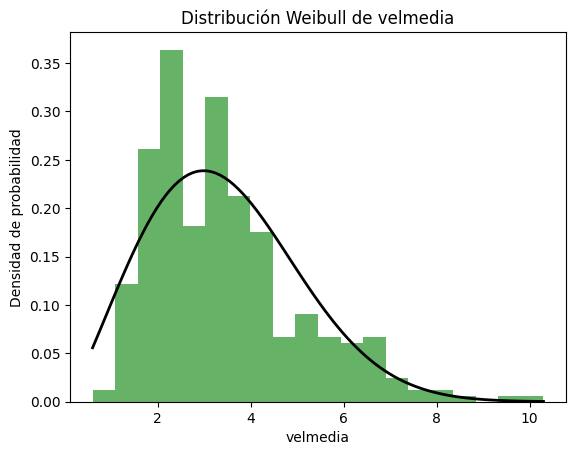

In [38]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import weibull_min

# Ajustar la distribución Weibull
shape, loc, scale = weibull_min.fit(df_final['velmedia'].dropna(), floc=0)  # floc=0 fija la ubicación en 0

# Generar el gráfico
plt.hist(df_final['velmedia'].dropna(), bins=20, density=True, alpha=0.6, color='g')

# Rango de valores para la PDF
x = np.linspace(df_final['velmedia'].min(), df_final['velmedia'].max(), 100)

# Calcular la PDF
pdf = weibull_min.pdf(x, shape, loc, scale)

# Superponer la PDF al histograma
plt.plot(x, pdf, 'k-', linewidth=2)

# Etiquetas y título
plt.title('Distribución Weibull de velmedia')
plt.xlabel('velmedia')
plt.ylabel('Densidad de probabilidad')

# Mostrar el gráfico
plt.show()

In [39]:
from google.colab import files

# Guardar el DataFrame como un archivo CSV
df_final.to_csv('df_final.csv', index=True)

# Descargar el archivo CSV
files.download('df_final.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [26]:
df_final

,altitud,tmed,prec,dir,velmedia,racha,horaracha,dir_rad
FECHA,,,,,,,,
2024-01-01,1100.0,3.6,0.0,29.0,4.7,12.2,12:50,0.506145
2024-01-02,1100.0,3.6,14.8,20.0,3.3,9.7,14:50,0.349066
2024-01-03,1100.0,7.7,2.8,26.0,5.3,13.6,14:10,0.453786
2024-01-04,1100.0,5.5,1.8,28.0,1.7,8.3,00:30,0.488692
2024-01-05,1100.0,3.0,1.8,28.0,4.4,13.1,14:20,0.488692
...,...,...,...,...,...,...,...,...
2024-12-27,1100.0,4.8,0.0,11.0,1.9,5.8,09:50,0.191986
2024-12-28,1100.0,5.3,0.0,10.0,0.8,3.6,14:30,0.174533
2024-12-29,1100.0,3.6,0.0,14.0,0.8,3.9,13:00,0.244346


from matplotlib import pyplot as plt
_df_0['tmed'].plot(kind='hist', bins=20, title='tmed')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['prec'].plot(kind='hist', bins=20, title='prec')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['dir'].plot(kind='hist', bins=20, title='dir')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['velmedia'].plot(kind='hist', bins=20, title='velmedia')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='tmed', y='prec', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='prec', y='dir', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='dir', y='velmedia', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='velmedia', y='racha', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['altitud']
  ys = series['tmed']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('altitud', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('altitud')
_ = plt.ylabel('tmed')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['altitud']
  ys = series['prec']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('altitud', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('altitud')
_ = plt.ylabel('prec')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['altitud']
  ys = series['dir']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('altitud', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('altitud')
_ = plt.ylabel('dir')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['altitud']
  ys = series['velmedia']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('altitud', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('altitud')
_ = plt.ylabel('velmedia')

from matplotlib import pyplot as plt
_df_12['tmed'].plot(kind='line', figsize=(8, 4), title='tmed')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['prec'].plot(kind='line', figsize=(8, 4), title='prec')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['dir'].plot(kind='line', figsize=(8, 4), title='dir')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['velmedia'].plot(kind='line', figsize=(8, 4), title='velmedia')
plt.gca().spines[['top', 'right']].set_visible(False)

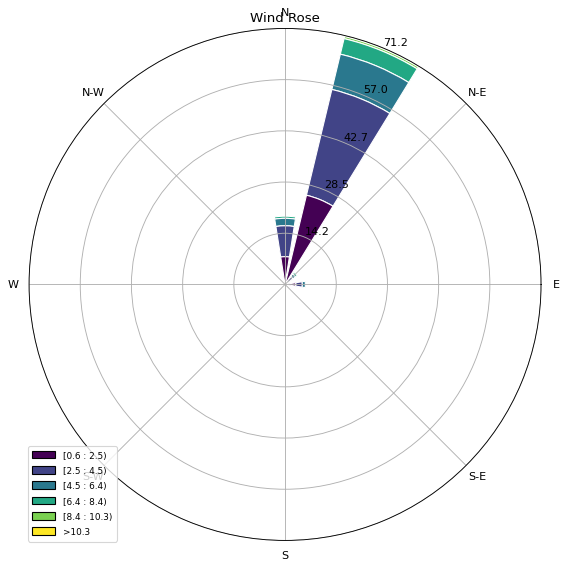

In [40]:
!pip install windrose

import matplotlib.pyplot as plt
import numpy as np
from windrose import WindroseAxes
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import pandas as pd


# Create wind speed and direction variables
ws = df_final['velmedia'].astype(float).values
wd = df_final['dir'].astype(float).values

# Remove NaN values from both ws and wd
# This ensures that both arrays have the same size after removing NaNs
mask = np.isfinite(ws) & np.isfinite(wd)
ws = ws[mask]
wd = wd[mask]

ax = WindroseAxes.from_ax()
ax.bar(wd, ws, normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.title('Wind Rose')
plt.show()

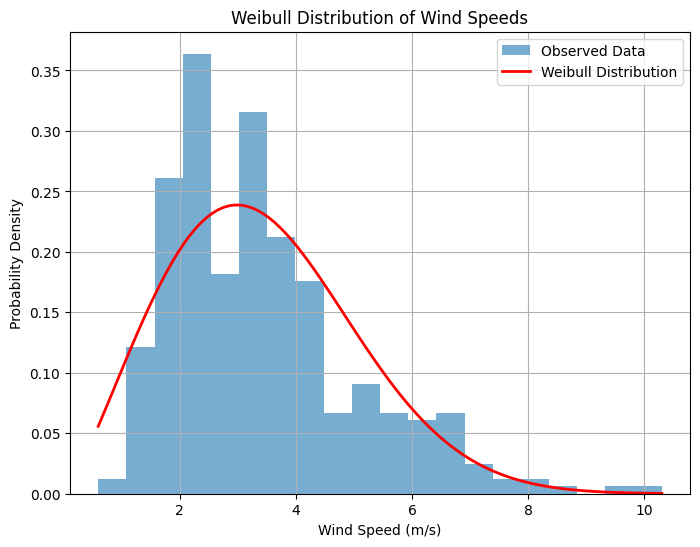

Shape parameter (k): 2.24
Scale parameter (c): 3.89


In [42]:
!pip install scipy

import numpy as np
import pandas as pd
from scipy.stats import weibull_min
import matplotlib.pyplot as plt

# Assuming 'velmedia' is your wind speed column in df_final
wind_speeds = df_final['velmedia'].dropna()  # Drop missing values if any

# Fit Weibull distribution
shape, loc, scale = weibull_min.fit(wind_speeds, floc=0)  # floc=0 sets location parameter to 0

# Generate x-values for the distribution
x = np.linspace(wind_speeds.min(), wind_speeds.max(), 100)

# Calculate Weibull probability density function (PDF)
pdf = weibull_min.pdf(x, shape, loc=loc, scale=scale)

# Plot the distribution
plt.figure(figsize=(8, 6))
plt.hist(wind_speeds, bins=20, density=True, alpha=0.6, label='Observed Data')  # Histogram of observed data
plt.plot(x, pdf, 'r-', linewidth=2, label='Weibull Distribution')  # Weibull PDF

plt.title('Weibull Distribution of Wind Speeds')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

# Print the fitted parameters
print(f"Shape parameter (k): {shape:.2f}")
print(f"Scale parameter (c): {scale:.2f}")

Data saved to: B:/HIBRIDACIÓN/DATOS_AEMET/df_final.csv
